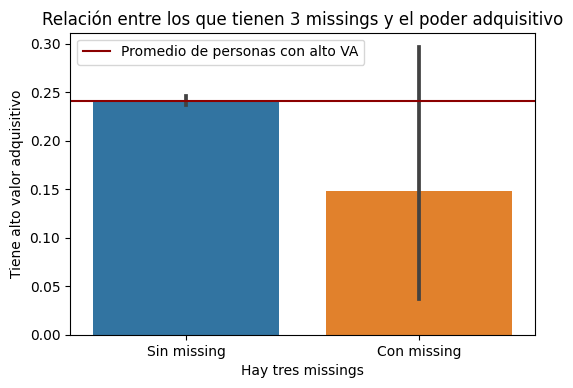

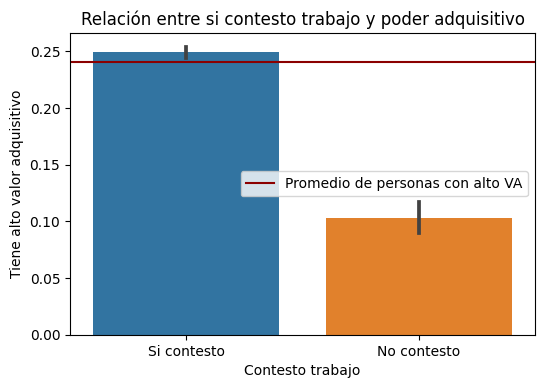

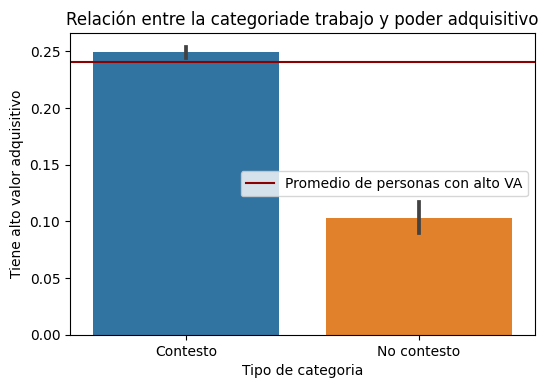

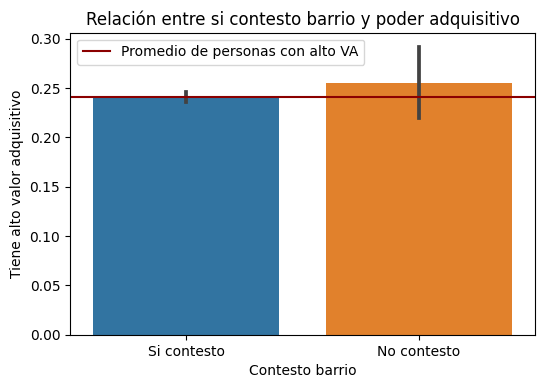

In [1]:
%run "../Secciones/feature_engineering.ipynb"

### horas_de_trabajo

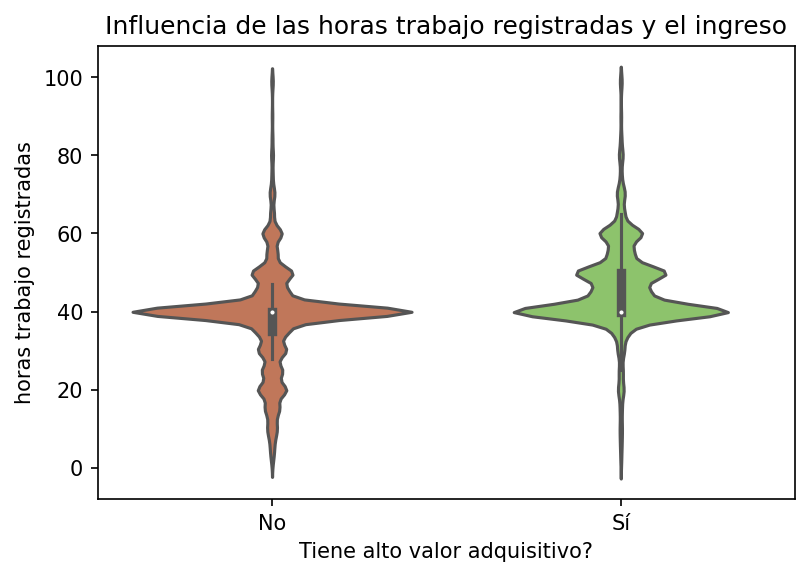

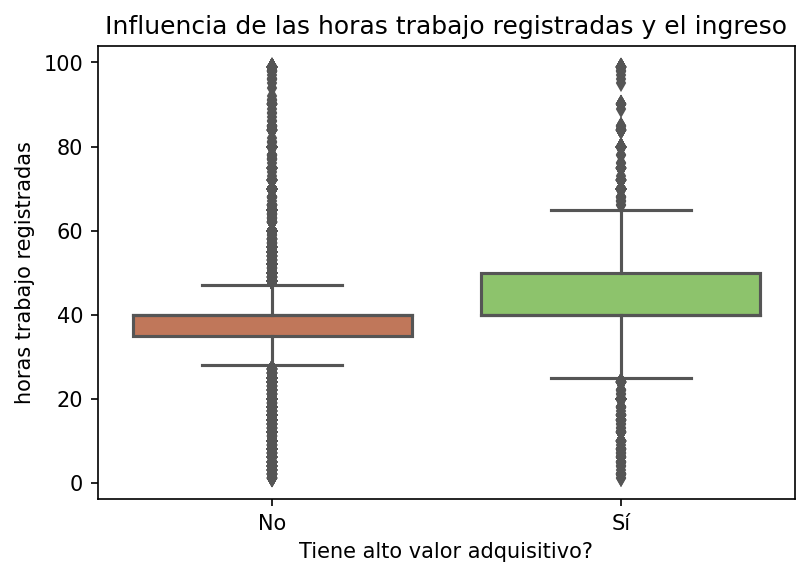

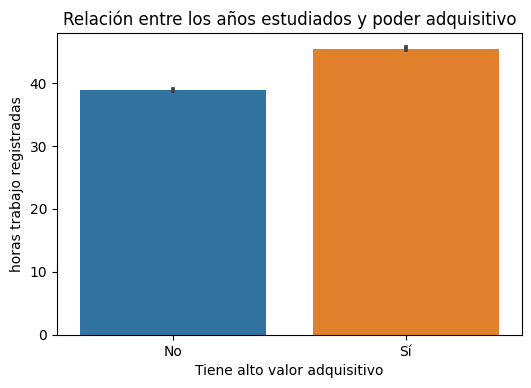

In [2]:
#VIOLINPLOT
plt.figure(dpi=150)
plt.title("Influencia de las horas trabajo registradas y el ingreso")
sns.violinplot(
    data=df,
    y='horas_trabajo_registradas',
    x='tiene_alto_valor_adquisitivo',
    palette=['#D17049', "#89D15E"],
)
plt.ylabel("horas trabajo registradas")
plt.xlabel("Tiene alto valor adquisitivo?")
plt.xticks([False, True], ["No", "Sí"])
plt.show()

#BOXPLOT
plt.figure(dpi=150)
plt.title("Influencia de las horas trabajo registradas y el ingreso")
sns.boxplot(
    data=df,
    y='horas_trabajo_registradas',
    x='tiene_alto_valor_adquisitivo',
    palette=['#D17049', "#89D15E"],
)
ax.tick_params(which='both', width=2)
plt.ylabel("horas trabajo registradas")
plt.xlabel("Tiene alto valor adquisitivo?")
plt.xticks([False, True], ["No", "Sí"])
plt.show()

#BARPLOT
plt.figure(dpi=100)
ax = sns.barplot(
    data=df,
    x='tiene_alto_valor_adquisitivo',
     y='horas_trabajo_registradas')

plt.ylabel("horas trabajo registradas")
plt.xlabel("Tiene alto valor adquisitivo")
plt.xticks([False, True], ["No", "Sí"])
plt.title('Relación entre los años estudiados y poder adquisitivo')
plt.show()

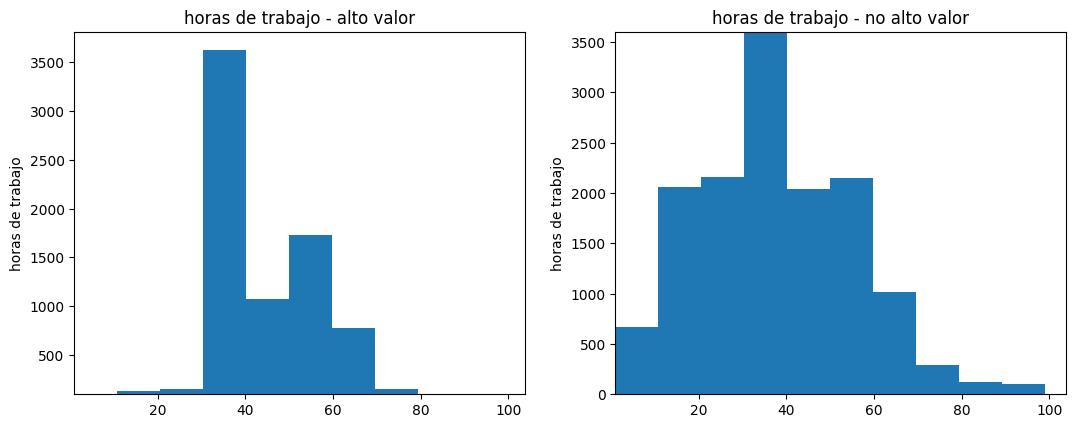

In [3]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=[6.4 * 2, 4.8], dpi=100)

df_alto_valor = df[df.tiene_alto_valor_adquisitivo == 1]
df_no_alto_valor = df[df.tiene_alto_valor_adquisitivo != 1]

df_alto_valor.horas_trabajo_registradas.plot(kind='hist', ax=axes[0], xlim=df.horas_trabajo_registradas.min(), ylim=df.horas_trabajo_registradas.max())
axes[0].set_title("horas de trabajo - alto valor")
axes[0].set_ylabel("horas de trabajo")

df_no_alto_valor.horas_trabajo_registradas.plot(kind='hist', ax=axes[1], xlim=df.horas_trabajo_registradas.min(), ylim=[0, 3600])
axes[1].set_title("horas de trabajo - no alto valor")
axes[1].set_ylabel("horas de trabajo")

plt.show()

Notas:

+ La cola del violinplot.(+)

+ Los overlide de el boxblot.(-)

+ Barblot muesta una tendencia natural +trabajo + plactica.(+)

In [4]:
df[df['horas_trabajo_registradas'] > 40]['tiene_alto_valor_adquisitivo'].value_counts()

0    5721
1    3855
Name: tiene_alto_valor_adquisitivo, dtype: int64

+ Si horas < 30: no tenes alto valor, efectividad relativa 93,3%, pero una efectividad global del 12,5%

In [5]:
df_alto_valor[df_alto_valor['horas_trabajo_registradas'] >= 40].value_counts().sum()/df_alto_valor.value_counts().sum() * 100

90.59589128493046

In [6]:
df[df['horas_trabajo_registradas'] >= 40].value_counts().sum()/df.value_counts().sum() * 100

76.17978909828757

In [7]:
df['tiene_alto_valor_adquisitivo'].value_counts().sum()

32527

### Estado marital y horas trabajadas

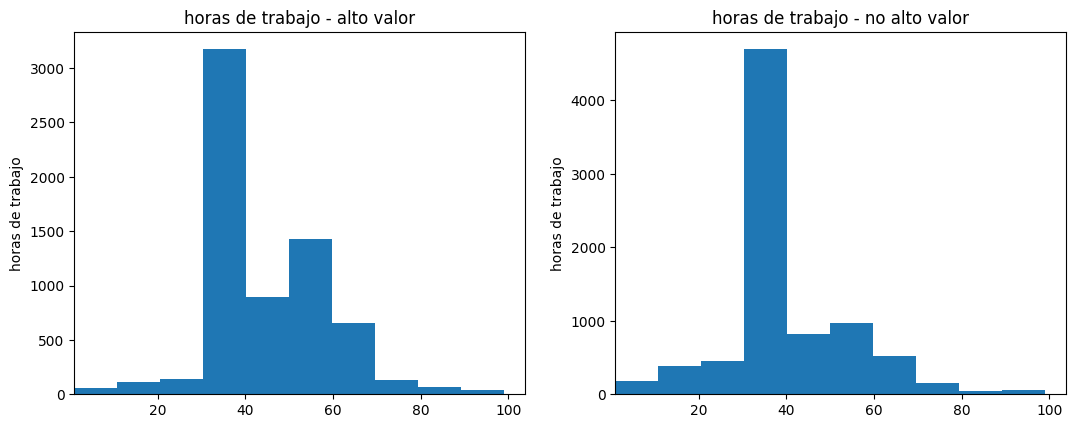

In [8]:
df_matrimonio = df[df['estado_marital'] == 'matrimonio']

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=[6.4 * 2, 4.8], dpi=100)

df_mat_alto_valor = df_matrimonio[df_matrimonio['tiene_alto_valor_adquisitivo'] == 1]
df_mat_bajo_valor = df_matrimonio[df_matrimonio['tiene_alto_valor_adquisitivo'] != 1]

df_mat_alto_valor.horas_trabajo_registradas.plot(kind='hist', ax=axes[0], xlim=df.horas_trabajo_registradas.min())
axes[0].set_title("horas de trabajo - alto valor")
axes[0].set_ylabel("horas de trabajo")

df_mat_bajo_valor.horas_trabajo_registradas.plot(kind='hist', ax=axes[1], xlim=df.horas_trabajo_registradas.min())
axes[1].set_title("horas de trabajo - no alto valor")
axes[1].set_ylabel("horas de trabajo")

plt.show()

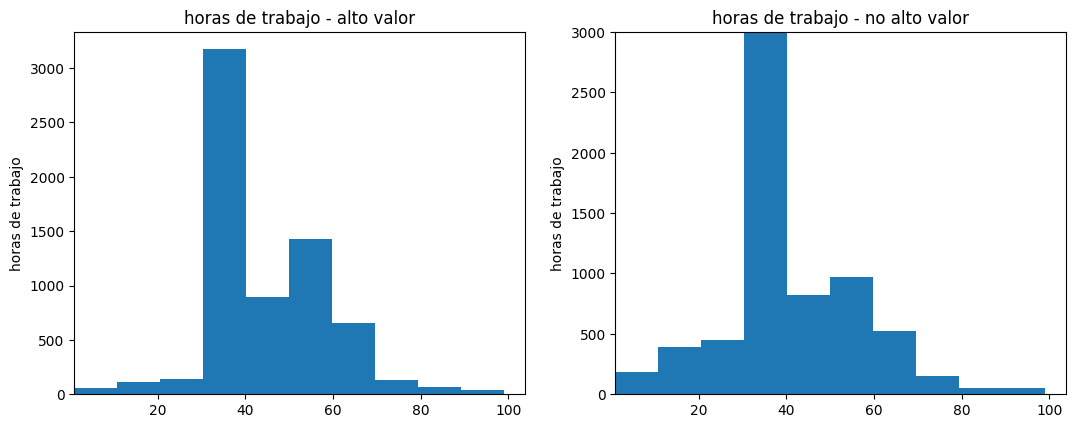

In [12]:
condicion = (df['trabajo'] != 'directivo_gerente') | (df['trabajo'] != 'profesional_especializado') | (df['trabajo'] != 'ventas')
df_sm_nt = df[(df['estado_marital'] == 'matrimonio') & (condicion)]

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=[6.4 * 2, 4.8], dpi=100)

df_sm_nt_alto_valor = df_sm_nt[df_sm_nt['tiene_alto_valor_adquisitivo'] == 1]
df_sm_nt_bajo_valor = df_sm_nt[df_sm_nt['tiene_alto_valor_adquisitivo'] != 1]

df_sm_nt_alto_valor.horas_trabajo_registradas.plot(kind='hist', ax=axes[0], xlim=df_sm_nt.horas_trabajo_registradas.min())
axes[0].set_title("horas de trabajo - alto valor")
axes[0].set_ylabel("horas de trabajo")

df_sm_nt_bajo_valor.horas_trabajo_registradas.plot(kind='hist', ax=axes[1], xlim=df_sm_nt.horas_trabajo_registradas.min(), ylim=[0, 3000])
axes[1].set_title("horas de trabajo - no alto valor")
axes[1].set_ylabel("horas de trabajo")

plt.show()